In [1]:
#-*coding:utf-8 -*-

import pathlib
import random
from functools import reduce
from collections import defaultdict

import pandas as pd
import geopandas as gpd
import folium
import shapely
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import xgboost
import sklearn.cluster
import tensorflow as tf
import matplotlib as mpl
import seaborn as sns

from pandas import DataFrame
from geoband import API
from folium import Map, CircleMarker, Vega, Popup
from vincent import Bar
import math

# 제공된 데이터

In [16]:
input_path = pathlib.Path('./input')
if not input_path.is_dir():
    input_path.mkdir()

from geoband.API import *
GetCompasData('SBJ_2102_001', '1', '1.세종시_전유부.csv')
GetCompasData('SBJ_2102_001', '2', '2.세종시_표제부.csv')
GetCompasData('SBJ_2102_001', '3', '3.세종시_아파트(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '4', '4.세종시_연립다세대(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '5', '5.세종시_단독다가구(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '6', '6.세종시_오피스텔(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '7', '7.세종시_아파트(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '8', '8.세종시_연립다세대(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '9', '9.세종시_단독다가구(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '10', '10.세종시_오피스텔(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '11', '11.세종시_상업업무용(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '12', '12.세종시_토지(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '13', '13.세종시_분양권_실거래가.csv')
GetCompasData('SBJ_2102_001', '14', '14.세종시_상권정보.csv')
GetCompasData('SBJ_2102_001', '15', '15.세종시_상권정보_업종코드.csv')
GetCompasData('SBJ_2102_001', '16', '16.세종시_사업체_매출정보.geojson')
GetCompasData('SBJ_2102_001', '17', '17.세종시_사업체_매출정보.csv')
GetCompasData('SBJ_2102_001', '18', '18.세종시_개별공시지가(2017~2020).csv')
GetCompasData('SBJ_2102_001', '19', '19.세종시_연령별_거주인구정보_격자.geojson')
GetCompasData('SBJ_2102_001', '20', '20.세종시_전입자수.csv')
GetCompasData('SBJ_2102_001', '21', '21.세종시_전출자수.csv')
GetCompasData('SBJ_2102_001', '22', '22.세종시_연령별_인구현황.csv')
GetCompasData('SBJ_2102_001', '23', '23.세종시_도로명주소_건물.geojson')
GetCompasData('SBJ_2102_001', '24', '24.세종시_건축물연면적_격자.geojson')
GetCompasData('SBJ_2102_001', '25', '25.세종시_가구_월평균_소비지출액.csv')
GetCompasData('SBJ_2102_001', '26', '26.세종시_거주기간.csv')
GetCompasData('SBJ_2102_001', '27', '27.세종시_월평균_가구소득.csv')
GetCompasData('SBJ_2102_001', '28', '28.세종시_지역별_세대원수별_세대수.csv')
GetCompasData('SBJ_2102_001', '29', '29.세종시_거주의사(향후).csv')
GetCompasData('SBJ_2102_001', '30', '30.세종시_법정경계(시군구).geojson')
GetCompasData('SBJ_2102_001', '31', '31.세종시_법정경계(읍면동).geojson')
GetCompasData('SBJ_2102_001', '32', '32.세종시_행정경계(읍면동).geojson')
GetCompasData('SBJ_2102_001', '33', '33.세종시_지적도.geojson')
GetCompasData('SBJ_2102_001', '34', '34.세종시_건물분포_이미지.zip')

for path in list(input_path.glob('*.csv')) + list(input_path.glob('*.geojson')):
    print(path)

input/1.세종시_전유부.csv
input/10.세종시_오피스텔(전월세)_실거래가.csv
input/11.세종시_상업업무용(매매)_실거래가.csv
input/12.세종시_토지(매매)_실거래가.csv
input/14.세종시_상권정보.csv
input/13.세종시_분양권_실거래가.csv
input/15.세종시_상권정보_업종코드.csv
input/18.세종시_개별공시지가(2017~2020).csv
input/17.세종시_사업체_매출정보.csv
input/2.세종시_표제부.csv
input/20.세종시_전입자수.csv
input/21.세종시_전출자수.csv
input/22.세종시_연령별_인구현황.csv
input/25.세종시_가구_월평균_소비지출액.csv
input/26.세종시_거주기간.csv
input/27.세종시_월평균_가구소득.csv
input/28.세종시_지역별_세대원수별_세대수.csv
input/29.세종시_거주의사(향후).csv
input/3.세종시_아파트(매매)_실거래가.csv
input/4.세종시_연립다세대(매매)_실거래가.csv
input/5.세종시_단독다가구(매매)_실거래가.csv
input/6.세종시_오피스텔(매매)_실거래가.csv
input/7.세종시_아파트(전월세)_실거래가.csv
input/8.세종시_연립다세대(전월세)_실거래가.csv
input/9.세종시_단독다가구(전월세)_실거래가.csv
input/16.세종시_사업체_매출정보.geojson
input/19.세종시_연령별_거주인구정보_격자.geojson
input/23.세종시_도로명주소_건물.geojson
input/24.세종시_건축물연면적_격자.geojson
input/30.세종시_법정경계(시군구).geojson
input/31.세종시_법정경계(읍면동).geojson
input/32.세종시_행정경계(읍면동).geojson
input/33.세종시_지적도.geojson


# 지역별 매매 평균값 그래프

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


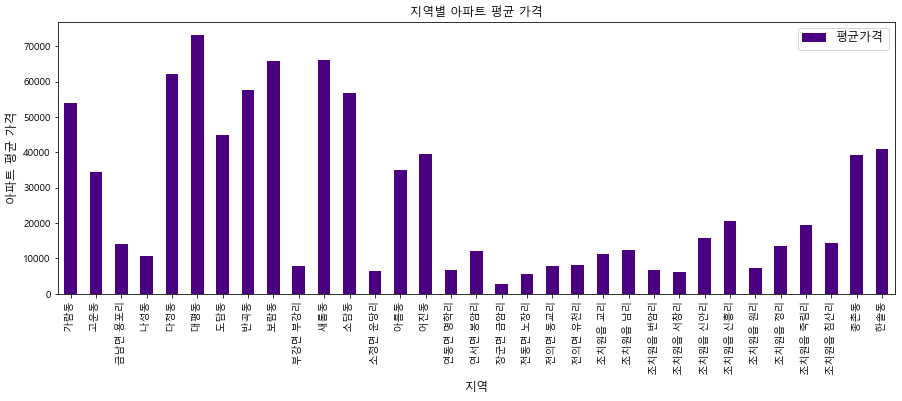

In [25]:
# 자료 불러오기
아파트_매매= pd.read_csv(input_path.joinpath('3.세종시_아파트(매매)_실거래가.csv'), encoding = 'utf-8' )
아파트_매매

# 세종 특별자치시 없애기
for i in range(len(아파트_매매['시군구'])):
    아파트_매매['시군구'][i] = 아파트_매매['시군구'][i][7:]

# col 확인
아파트_매매.columns

# 주소별 거래금액 평균 구하기
아파트_매매['거래금액(만원)'] = 아파트_매매['거래금액(만원)'].apply(lambda x: float(x.split()[0].replace(',','')))
data_아파트 = 아파트_매매.groupby('시군구')['거래금액(만원)'].mean()
data_아파트

# 그래프 한글깨짐 방지
import matplotlib 
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_아파트.plot(kind ='bar', title ='지역별 아파트 평균 가격', figsize =(15, 5), legend=True, fontsize = 10, color='indigo')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('아파트 평균 가격', fontsize = 12)
ax.legend(['평균가격'], fontsize=12)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


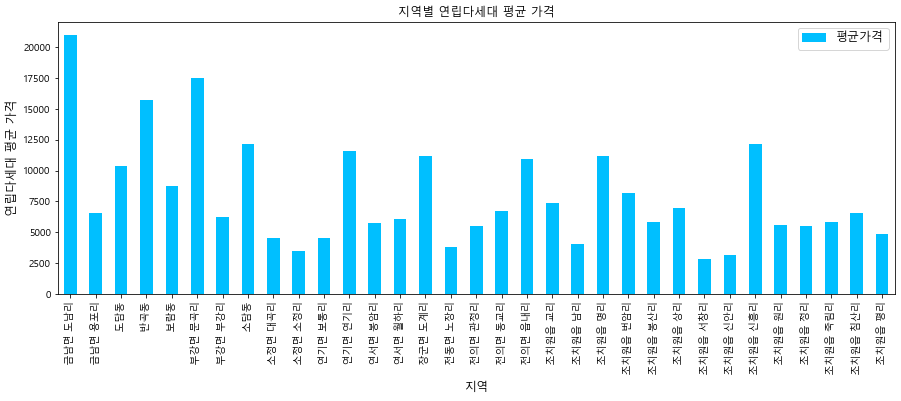

In [22]:
# 자료 불러오기
연립다세대_매매= pd.read_csv(input_path.joinpath('4.세종시_연립다세대(매매)_실거래가.csv'), thousands = ',', encoding = 'utf-8' )
연립다세대_매매

# 세종 특별자치시 없애기
for i in range(len(연립다세대_매매['시군구'])):
    연립다세대_매매['시군구'][i] = 연립다세대_매매['시군구'][i][7:]

# col 확인
연립다세대_매매.columns

# 주소별 거래금액 평균 구하기
data_연립다세대 = 연립다세대_매매.groupby('시군구')['거래금액(만원)'].mean()
data_연립다세대

# 그래프 한글깨짐 방지
import matplotlib 
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_연립다세대.plot(kind ='bar', title ='지역별 연립다세대 평균 가격', figsize =(15, 5), legend=True, fontsize = 10, color='deepskyblue')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('연립다세대 평균 가격', fontsize = 12)
ax.legend(['평균가격'], fontsize=12)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


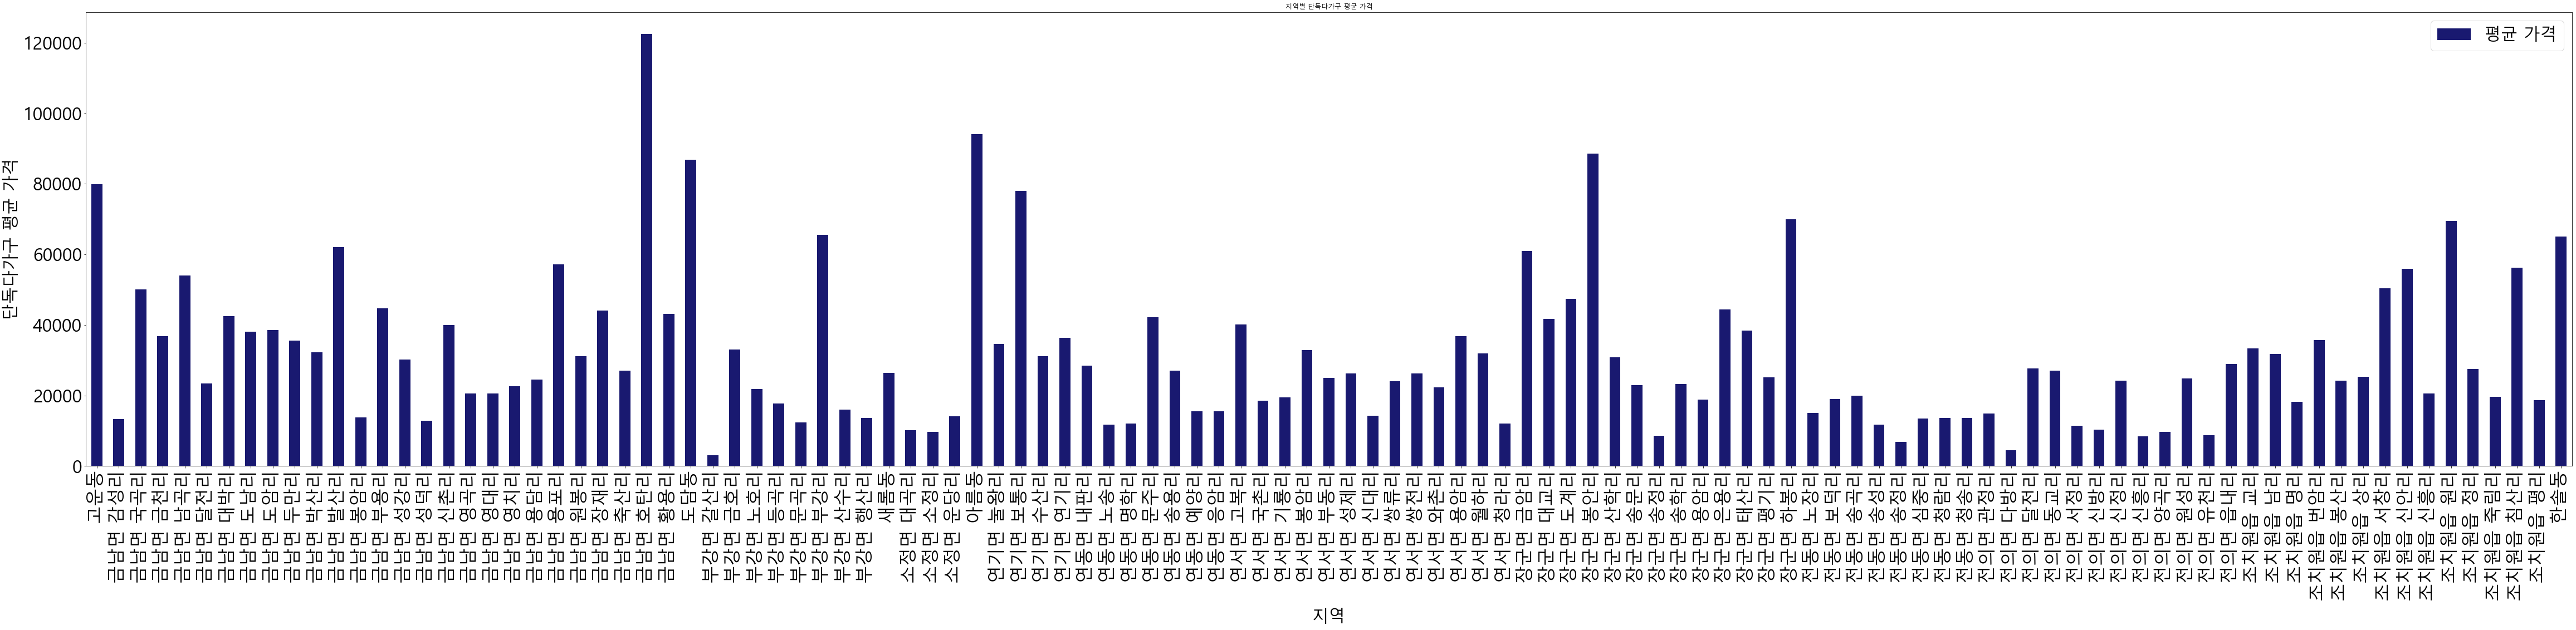

In [24]:
# 자료 불러오기
단독다가구_매매= pd.read_csv(input_path.joinpath('5.세종시_단독다가구(매매)_실거래가.csv'), encoding = 'utf-8' )
단독다가구_매매

# 세종 특별자치시 없애기
for i in range(len(단독다가구_매매['시군구'])):
    단독다가구_매매['시군구'][i] = 단독다가구_매매['시군구'][i][7:]

# col 확인
단독다가구_매매.columns

# 주소별 거래금액 평균 구하기
단독다가구_매매['거래금액(만원)'] = 단독다가구_매매['거래금액(만원)'].apply(lambda x: float(x.split()[0].replace(',','')))
data_단독다가구 = 단독다가구_매매.groupby('시군구')['거래금액(만원)'].mean()
data_단독다가구

# 그래프 한글깨짐 방지
import matplotlib 
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_단독다가구.plot(kind='bar', title='지역별 단독다가구 평균 가격', figsize=(80,15), legend=True, fontsize=32, color='midnightblue')
ax.set_xlabel('지역',fontsize=30)
ax.set_ylabel('단독다가구 평균 가격', fontsize=30)
ax.legend(['평균 가격'],fontsize=30)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


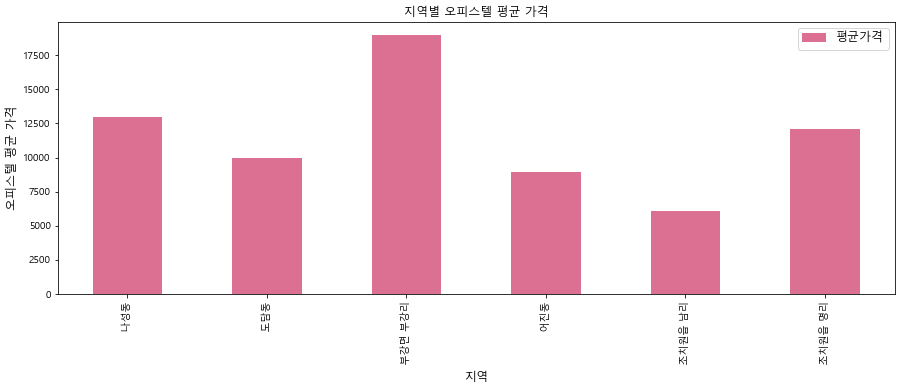

In [27]:
# 자료 불러오기
오피스텔_매매= pd.read_csv(input_path.joinpath('6.세종시_오피스텔(매매)_실거래가.csv'), encoding = 'utf-8' )
오피스텔_매매

# 세종 특별자치시 없애기
for i in range(len(오피스텔_매매['시군구'])):
    오피스텔_매매['시군구'][i] = 오피스텔_매매['시군구'][i][7:]

# col 확인
오피스텔_매매.columns

# 주소별 거래금액 평균 구하기
오피스텔_매매['거래금액(만원)'] = 오피스텔_매매['거래금액(만원)'].apply(lambda x: float(x.split()[0].replace(',','')))
data_오피스텔 = 오피스텔_매매.groupby('시군구')['거래금액(만원)'].mean()
data_오피스텔

# 그래프 한글깨짐 방지
import matplotlib 
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_오피스텔.plot(kind ='bar', title ='지역별 오피스텔 평균 가격', figsize =(15, 5), legend=True, fontsize = 10, color='palevioletred')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('오피스텔 평균 가격', fontsize = 12)
ax.legend(['평균가격'], fontsize=12)

# 지역별 전,월세 평균값 그래프

In [ ]:
# 자료 불러오기
아파트_전월세= pd.read_csv(input_path.joinpath('7.세종시_아파트(전월세)_실거래가.csv'),thousands = ',',encoding='cp949' )
아파트_전월세

# 행 확인
아파트_전월세.columns

# 세종특별자치시 없애기
for i in range(len(아파트_전월세['시군구'])):
    아파트_전월세['시군구'][i] = 아파트_전월세['시군구'][i][7:]

# 지역마다 전,월세 평균
data_아파트_전월세 = 아파트_전월세.groupby(['시군구', '전월세구분'])[['보증금(만원)', '월세(만원)']].mean()
data_아파트_전월세 = data_아파트_전월세.unstack().fillna(0)
data_아파트_전월세

data_아파트_전월세_월세보증금 = data_아파트_전월세['보증금(만원)','월세']
data_아파트_전월세_월세 = data_아파트_전월세['월세(만원)','월세']
data_아파트_전세 = data_아파트_전월세['보증금(만원)','전세']

#data_아파트_전월세['보증금(만원)','전세'] = data_아파트_전세
del(data_아파트_전월세['월세(만원)','전세'])
del(data_아파트_전월세['보증금(만원)','전세'])

round(data_아파트_전월세,2)

# 그래프 한글깨짐 방지
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_아파트_전월세.plot(kind ='bar', title ='지역별 아파트 전월세 평균 가격', figsize =(15, 5), legend=True, fontsize = 10, color=[ 'dodgerblue', 'crimson'])
plt.plot(data_아파트_전세, linestyle='--', color = 'orangered')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('아파트 평균 가격(전월세)', fontsize = 12)
ax.legend(['전세 가격','월세보증금', '월세 가격'], fontsize=12)

for i, v in enumerate(data_아파트_전월세['월세(만원)','월세']):
    ax.text(i-0.1, v+v*20, str(round(v, 1)))

In [ ]:
# 자료 불러오기
연립다세대_전월세= pd.read_csv(input_path.joinpath('8.세종시_연립다세대(전월세)_실거래가.csv'),thousands = ',',encoding='cp949' )
연립다세대_전월세

# 행 확인
연립다세대_전월세.columns

# 세종특별자치시 없애기
for i in range(len(연립다세대_전월세['시군구'])):
    연립다세대_전월세['시군구'][i] = 연립다세대_전월세['시군구'][i][7:]

# 지역마다 전,월세 평균
data_연립다세대_전월세 = 연립다세대_전월세.groupby(['시군구', '전월세구분'])[['보증금(만원)', '월세(만원)']].mean()
data_연립다세대_전월세 = data_연립다세대_전월세.unstack().fillna(0)
data_연립다세대_전월세

data_연립다세대_전월세_월세보증금 = data_연립다세대_전월세['보증금(만원)','월세']
data_연립다세대_전월세_월세 = data_연립다세대_전월세['월세(만원)','월세']
data_연립다세대_전세 = data_연립다세대_전월세['보증금(만원)','전세']

#data_연립다세대_전월세['보증금(만원)','전세'] = data_연립다세대_전세
del(data_연립다세대_전월세['월세(만원)','전세'])
del(data_연립다세대_전월세['보증금(만원)','전세'])

round(data_연립다세대_전월세,2)

# 그래프 한글깨짐 방지
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_연립다세대_전월세.plot(kind ='bar', title ='지역별 연립다세대 전월세 평균 가격', figsize =(15, 5), legend=True, fontsize = 10, color=[ 'dodgerblue', 'crimson'])
plt.plot(data_연립다세대_전세, linestyle='--', color = 'orangered')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('연립다세대 평균 가격(전월세)', fontsize = 12)
ax.legend(['전세 가격','월세보증금', '월세 가격'], fontsize=12)

for i, v in enumerate(data_연립다세대_전월세['월세(만원)','월세']):
    ax.text(i-0.1, v+v*20, str(round(v, 1)))

In [ ]:
# 자료 불러오기
단독다가구_전월세= pd.read_csv(input_path.joinpath('9.세종시_단독다가구(전월세)_실거래가.csv'),thousands = ',',encoding='cp949' )
단독다가구_전월세

# 행 확인
단독다가구_전월세.columns

# 세종특별자치시 없애기
for i in range(len(단독다가구_전월세['시군구'])):
    단독다가구_전월세['시군구'][i] = 단독다가구_전월세['시군구'][i][7:]

# 지역마다 전,월세 평균
data_단독다가구_전월세 = 단독다가구_전월세.groupby(['시군구', '전월세구분'])[['보증금(만원)', '월세(만원)']].mean()
data_단독다가구_전월세 = data_단독다가구_전월세.unstack().fillna(0)
data_단독다가구_전월세

data_단독다가구_전월세_월세보증금 = data_단독다가구_전월세['보증금(만원)','월세']
data_단독다가구_전월세_월세 = data_단독다가구_전월세['월세(만원)','월세']
data_단독다가구_전세 = data_단독다가구_전월세['보증금(만원)','전세']

#data_단독다가구_전월세['보증금(만원)','전세'] = data_단독다가구_전세
del(data_단독다가구_전월세['월세(만원)','전세'])
del(data_단독다가구_전월세['보증금(만원)','전세'])

round(data_단독다가구_전월세,2)

# 그래프 한글깨짐 방지
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_단독다가구_전월세.plot(kind ='bar', title ='지역별 단독다가구 전월세 평균 가격', figsize =(80, 15), legend=True, fontsize = 32, color=[ 'dodgerblue', 'crimson'])
plt.plot(data_단독다가구_전세, linestyle='--', color = 'orangered')
ax.set_xlabel('지역', fontsize = 30)
ax.set_ylabel('단독다가구 평균 가격(전월세)', fontsize = 30)
ax.legend(['전세 가격','월세보증금', '월세 가격'], fontsize=20)

for i, v in enumerate(data_단독다가구_전월세['월세(만원)','월세']):
    ax.text(i-0.1, v+v*20, str(round(v, 1)))

In [ ]:
# 자료 불러오기
오피스텔_전월세= pd.read_csv(input_path.joinpath('10.세종시_오피스텔(전월세)_실거래가.csv'),thousands = ',',encoding='cp949' )
오피스텔_전월세

# 행 확인
오피스텔_전월세.columns

# 세종특별자치시 없애기
for i in range(len(오피스텔_전월세['시군구'])):
    오피스텔_전월세['시군구'][i] = 오피스텔_전월세['시군구'][i][7:]

# 지역마다 전,월세 평균
data_오피스텔_전월세 = 오피스텔_전월세.groupby(['시군구', '전월세구분'])[['보증금(만원)', '월세(만원)']].mean()
data_오피스텔_전월세 = data_오피스텔_전월세.unstack().fillna(0)
data_오피스텔_전월세

data_오피스텔_전월세_월세보증금 = data_오피스텔_전월세['보증금(만원)','월세']
data_오피스텔_전월세_월세 = data_오피스텔_전월세['월세(만원)','월세']
data_오피스텔_전세 = data_오피스텔_전월세['보증금(만원)','전세']

#data_오피스텔_전월세['보증금(만원)','전세'] = data_오피스텔_전세
del(data_오피스텔_전월세['월세(만원)','전세'])
del(data_오피스텔_전월세['보증금(만원)','전세'])

round(data_오피스텔_전월세,2)

# 그래프 한글깨짐 방지
matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# 지역 별 평균 가격 그래프
ax = data_오피스텔_전월세.plot(kind ='bar', title ='지역별 오피스텔 전월세 평균 가격', figsize =(15, 5), legend=True, fontsize = 10, color=[ 'dodgerblue', 'crimson'])
plt.plot(data_오피스텔_전세, linestyle='--', color = 'orangered')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('오피스텔 평균 가격(전월세)', fontsize = 12)
ax.legend(['전세 가격','월세보증금', '월세 가격'], fontsize=12)

for i, v in enumerate(data_오피스텔_전월세['월세(만원)','월세']):
    ax.text(i+0.05, v+v*20, str(round(v, 1)))

# geojson 자료 확인

In [ ]:
연령별_거주인구 = gpd.read_file(input_path.joinpath('19.세종시_연령별_거주인구정보_격자.geojson'))
연령별_거주인구

In [ ]:
도로명주소 = gpd.read_file(input_path.joinpath('23.세종시_도로명주소_건물.geojson'))
도로명주소

In [ ]:
건축물연면적 = gpd.read_file(input_path.joinpath('24.세종시_건축물연면적_격자.geojson'))
건축물연면적

In [ ]:
법정경계_시군구 = gpd.read_file(input_path.joinpath('30.세종시_법정경계(시군구).geojson'))
법정경계_시군구

In [ ]:
법정경계_읍면동 = gpd.read_file(input_path.joinpath('31.세종시_법정경계(읍면동).geojson'))
법정경계_읍면동

In [ ]:
행정경계_읍면동 = gpd.read_file(input_path.joinpath('32.세종시_행정경계(읍면동).geojson'))
행정경계_읍면동

In [ ]:
지적도 = gpd.read_file(input_path.joinpath('33.세종시_지적도.geojson'))
지적도

In [ ]:
사업체_매출정보 = gpd.read_file(input_path.joinpath('16.세종시_사업체_매출정보.geojson'))
사업체_매출정보

# 지역별 상권정보

In [ ]:
# 자료 불러오기
상권정보 = pd.read_csv(input_path.joinpath('14.세종시_상권정보.csv'))
상권정보

In [ ]:
# 지역별 각 상점 개수와 합계
data_상권정보 = pd.crosstab(상권정보.행정동명, 상권정보.상권업종대분류명, margins=True)
data_상권정보

In [ ]:
# 지역별 상권 수
data_상권정보_all = data_상권정보['All']
data_상권정보_all


In [ ]:
# 지역별 위도와 경도
행정경계_읍면동 = gpd.read_file(input_path.joinpath('32.세종시_행정경계(읍면동).geojson'))
행정경계_읍면동

행정경계_읍면동['lon'] = (행정경계_읍면동['geometry'].bounds['maxx'] + 행정경계_읍면동['geometry'].bounds['minx'])/2
행정경계_읍면동['lat'] = (행정경계_읍면동['geometry'].bounds['maxy'] + 행정경계_읍면동['geometry'].bounds['miny'])/2
data_상권정보_lon_lat = 행정경계_읍면동[['ADM_DR_NM', 'lon', 'lat']]
data_상권정보_lon_lat=data_상권정보_lon_lat.rename(columns={'ADM_DR_NM':'행정동명'})
data_상권정보_lon_lat

In [ ]:
# 지역별 위도와 경도, 총 상점 수 합치기
data_상권정보_info = pd.merge( data_상권정보_all,data_상권정보_lon_lat, on ="행정동명")
data_상권정보_info

In [ ]:
# 상권업종대분류명 사전순 정렬
data_상권정보 = 상권정보
data_상권정보 = data_상권정보.sort_values(by='상권업종대분류명')
data_상권정보

data_상권정보 = data_상권정보[['상권업종대분류명', '도로명주소', 'lon', 'lat']]

# 상권업종대분류명을 상권종류로 이름 변경
data_상권정보.rename(columns={'상권업종대분류명':'상권종류'}, inplace = True)
data_상권정보


In [ ]:
# 지역 별 평균 상권 수 그래프
plt.figure(figsize= (15,6))
sns.countplot(data = 상권정보, x="행정동명", order=상권정보['행정동명'].value_counts().index)

# 상권 수 지도에 표시

In [ ]:
# 위도, 경도, 총 상권 개수를 float 형으로 바꿈
data_상권정보_info['lon'] = data_상권정보_info.lon.astype(float)
data_상권정보_info['lat'] = data_상권정보_info.lat.astype(float)
data_상권정보_info['All'] = data_상권정보_info.All.astype(float)
data_상권정보_info

# 상권 수 시각화
상권수_map = folium.Map(location = [data_상권정보_info['lat'].mean(), data_상권정보_info['lon'].mean()],zoom_start = 11)

for item in data_상권정보_info.index:
    latitude = data_상권정보_info.loc[item,'lat']
    longtitude = data_상권정보_info.loc[item,'lon']
    popups = folium.Popup(data_상권정보_info.loc[item, '행정동명'], max_width=100)
    folium.CircleMarker([latitude, longtitude],
                       radius = data_상권정보_info.loc[item,'All']/100,
                       popup = popups,
                       color = 'red',
                       fill = True).add_to(상권수_map)
상권수_map



# 상권 수 지도에 표시2

In [ ]:
# 자료 불러오기
행정경계_읍면동 = gpd.read_file(input_path.joinpath('32.세종시_행정경계(읍면동).geojson'))
행정경계_읍면동

data = data_상권정보_info[['행정동명', 'All']]
data

# 지도
상권수_map2 = folium.Map(location = [data_상권정보_info['lat'].mean(), data_상권정보_info['lon'].mean()],zoom_start = 11)

상권수_map2.choropleth(
    geo_data = 행정경계_읍면동,
    data = data,
    columns=['행정동명', 'All'],
    key_on = 'feature.properties.ADM_DR_NM',
    fill_color = 'BuPu',
    legend_name ='상권 수',
    )
                       
상권수_map2

# 상권 정보 지도에 표시

In [ ]:

data_상권정보 = 상권정보
data_상권정보 = data_상권정보[['상권업종대분류명', '도로명주소', 'lon', 'lat']]

# 상권업종대분류명을 상권종류로 이름 변경
data_상권정보.rename(columns={'상권업종대분류명':'상권종류'}, inplace = True)
data_상권정보


# 위도, 경도 값 형 변환
data_상권정보['lon'] = data_상권정보.lon.astype(float)
data_상권정보['lat'] = data_상권정보.lat.astype(float)


# 지도

상권종류_map = folium.Map(location = [data_상권정보['lat'].mean(), data_상권정보['lon'].mean()],zoom_start = 11)

for item in data_상권정보.index:
    latitude = data_상권정보.loc[item,'lat']
    longtitude = data_상권정보.loc[item,'lon']
    
    if data_상권정보.loc[item, '상권종류'] == '관광/여가/오락':
        colors = 'dodgerblue'
    
    elif data_상권정보.loc[item, '상권종류'] == '부동산':
        colors = 'burlywood'
    
    elif data_상권정보.loc[item, '상권종류'] == '생활서비스':
        colors = 'gold'
    
    elif data_상권정보.loc[item, '상권종류'] == '소매':
        colors = 'darkolivegreen'
    
    elif data_상권정보.loc[item, '상권종류'] == '학문/교육':
        colors = 'slategrey'
    
    elif data_상권정보.loc[item, '상권종류'] == '음식' :
        colors = 'salmon'
    
    elif data_상권정보.loc[item, '상권종류'] == '스포츠' :
        colors = 'blueviolet'
    
    elif data_상권정보.loc[item, '상권종류'] == '숙박':
        colors = 'lihgtpink'
    popups = folium.Popup(data_상권정보.loc[item, '도로명주소'], max_width=150)
    folium.CircleMarker([latitude, longtitude],
                       popup = popups,
                       color = colors,
                       fill = True).add_to(상권종류_map)
상권종류_map


# 아파트 시세 지도

In [ ]:
아파트_매매

# 법정경계에 맞게 시군구 편집

data_시군구_아파트 = 아파트_매매[['시군구', '거래금액(만원)']]
for i in range(len(data_시군구_아파트['시군구'])):
    if len(data_시군구_아파트.loc[i, '시군구']) == 9:
        data_시군구_아파트['시군구'][i] = data_시군구_아파트['시군구'][i][:5]
    elif len(data_시군구_아파트.loc[i, '시군구']) == 8:
        
        if data_시군구_아파트.loc[i, '시군구'][1] == '조':
            data_시군구_아파트['시군구'][i] = data_시군구_아파트['시군구'][i][:5]
        else:
            data_시군구_아파트['시군구'][i] = data_시군구_아파트['시군구'][i][:5]    
    
            
data_시군구_아파트

In [ ]:
# 시군구별 거래금액(만원) 평균
data_시군구_아파트 = data_시군구_아파트.groupby(data_시군구_아파트.시군구)['거래금액(만원)'].mean()
data_시군구_아파트

data_시군구_아파트 = data_시군구_아파트.reset_index()
data_시군구_아파트

for i in range(len(data_시군구_아파트['시군구'])):
      data_시군구_아파트['시군구'][i] =  data_시군구_아파트['시군구'][i][1:]
        
data_시군구_아파트

In [ ]:
# 자료 불러오기
법정경계_시군구 = gpd.read_file(input_path.joinpath('31.세종시_법정경계(읍면동).geojson'))
법정경계_시군구

In [ ]:
# 지역별 위도와 경도
법정경계_시군구['lon']= (법정경계_시군구['geometry'].bounds['maxx'] + 법정경계_시군구['geometry'].bounds['minx'])/2
법정경계_시군구['lat'] = (법정경계_시군구['geometry'].bounds['maxy'] + 법정경계_시군구['geometry'].bounds['miny'])/2

data_아파트_lon_lat = 법정경계_시군구[['EMD_KOR_NM', 'lon', 'lat']]
data_아파트_lon_lat = data_아파트_lon_lat.rename(columns={'EMD_KOR_NM':'시군구'})
data_아파트_lon_lat

In [ ]:
# 법정경계에 맞춰 아파트 행 추가

data_시군구_아파트.loc[len(data_시군구_아파트)] = ['가람동', 0]
data_시군구_아파트.loc[len(data_시군구_아파트)] = ['산울동', 0]
data_시군구_아파트.loc[len(data_시군구_아파트)] = ['해밀동', 0]
data_시군구_아파트.loc[len(data_시군구_아파트)] = ['합강동', 0]
data_시군구_아파트.loc[len(data_시군구_아파트)] = ['집현동', 0]
data_시군구_아파트.loc[len(data_시군구_아파트)] = ['연기면', 0]
data_시군구_아파트

In [ ]:
data_시군구_아파트['시군구'][1] = '금남면'
data_시군구_아파트['시군구'][8] = '부강면'
data_시군구_아파트['시군구'][11] ='소정면'
data_시군구_아파트['시군구'][14] ='연동면'
data_시군구_아파트['시군구'][15] ='연서면'
data_시군구_아파트['시군구'][16] ='장군면'
data_시군구_아파트['시군구'][17]='전동면'
data_시군구_아파트['시군구'][18]='전의면'

In [ ]:
data_시군구_아파트_info = pd.merge(data_아파트_lon_lat, data_시군구_아파트, on ='시군구', how="outer")
data_시군구_아파트_info

In [ ]:
# 위도, 경도를 float 형으로 바꿈
data_시군구_아파트_info['lon'] = data_시군구_아파트_info.lon.astype(float)
data_시군구_아파트_info['lat'] = data_시군구_아파트_info.lat.astype(float)

In [ ]:
# 지도
법정경계_시군구 = gpd.read_file(input_path.joinpath('31.세종시_법정경계(읍면동).geojson'))
법정경계_시군구

아파트시세_map = folium.Map(location = [data_시군구_아파트_info['lat'].mean(), data_시군구_아파트_info['lon'].mean()] ,zoom_start = 11)

data = data_시군구_아파트_info[['시군구','거래금액(만원)']]

folium.Choropleth(
    geo_data = 법정경계_시군구,
    data = data,
    columns=['시군구','거래금액(만원)'],
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name ='아파트시세',
    ).add_to(아파트시세_map)
       

아파트시세_map


# 년도별 지역 전입, 전출자수

In [ ]:
# 자료 불러오기
전입= pd.read_csv(input_path.joinpath('20.세종시_전입자수.csv') )
전입

# 자료 불러오기
전출= pd.read_csv(input_path.joinpath('21.세종시_전출자수.csv') )
전출


In [ ]:
# 지역별 총 전입자 수 구하기
data_전입자수 = 전입.groupby('세종전입행정동')['전입자수'].agg('sum')
data_전입자수

# 지역별 총 전입자 수 구하기
data_전출자수 = 전출.groupby('세종전출행정동')['전출자수'].agg('sum')
data_전출자수

In [ ]:
ax = data_전입자수.plot(kind ='bar',title ='지역별 전입자 수', figsize =(15, 5), legend=True, fontsize = 10, color='white')
ax.plot(data_전출자수, linestyle='--', color ='blue')
ax.plot(data_전입자수, linestyle='--', color='red')
#ax = data_전입.plot(kind ='bar', title ='지역별 전입자 수', figsize =(15, 5), legend=True, fontsize = 10)
#plt.plot(data_전입, linestyle='--', color = 'orangered')
ax.set_xlabel('지역', fontsize = 12)
ax.set_ylabel('전입자 수', fontsize = 12)
ax.legend(['전입자 수'], fontsize=12)

# 지역별 지목 거래 금액과 계약 면적 표

In [ ]:
# 자료 불러오기
토지 = pd.read_csv(input_path.joinpath('12.세종시_토지(매매)_실거래가.csv') , encoding='cp949')

# 시군구 편집
for i in range(len(토지['시군구'])):
    토지['시군구'][i] = 토지['시군구'][i][8:12]
토지

In [ ]:
pd.set_option('display.max_rows', 700)

# 시군구마다 지목의 계약면적과 거래금액의 평균을 표로 표시
data_토지 = round(토지.groupby(['시군구','지목'])[['거래금액(만원)','계약면적(㎡)']].mean(),3)
data_토지 = data_토지.reset_index()
data_토지

In [ ]:
# 시군구별 지목-금액, 지목-면적으로 표 나누기
data_토지_금액 = data_토지[['지목', '거래금액(만원)']]
data_토지_면적 = data_토지[['지목', '계약면적(㎡)']]

# 지역별 지목 거래 금액과 거래 면적 지도

In [ ]:
# 31.세종시_법정경계(읍면동).geojson 에서 만든 시군구별 위도, 경도 표
지목_lon_lat = data_아파트_lon_lat
지목_lon_lat

In [ ]:
data_토지 = data_토지.reset_index()
data_토지

In [ ]:
# 시군구별로 지목 분리

data_고운동 = data_토지[data_토지['시군구'] == '고운동']
data_고운동 = data_고운동.set_index('지목')

data_금남면 = data_토지[data_토지['시군구'] == '금남면 ']
data_금남면 = data_금남면.set_index('지목')

data_나성동 = data_토지[data_토지['시군구'] == '나성동']
data_나성동 = data_나성동.set_index('지목')

data_다정동 = data_토지[data_토지['시군구'] == '다정동']
data_다정동 = data_다정동.set_index('지목')

data_대평동 = data_토지[data_토지['시군구'] == '대평동']
data_대평동 = data_대평동.set_index('지목')

data_도담동 = data_토지[data_토지['시군구'] == '도담동']
data_도담동 = data_도담동.set_index('지목')

data_반곡동 = data_토지[data_토지['시군구'] == '반곡동']
data_반곡동 = data_반곡동.set_index('지목')

data_보람동 = data_토지[data_토지['시군구'] == '보람동']
data_보람동 = data_보람동.set_index('지목')

data_부강면 = data_토지[data_토지['시군구'] == '부강면 ']
data_부강면 = data_부강면.set_index('지목')

data_새롬동 = data_토지[data_토지['시군구'] == '새롬동']
data_새롬동 = data_새롬동.set_index('지목')

data_소담동 = data_토지[data_토지['시군구'] == '소담동']
data_소담동 = data_소담동.set_index('지목')

data_소정면 = data_토지[data_토지['시군구'] == '소정면 ']
data_소정면 = data_소정면.set_index('지목')

data_아름동 = data_토지[data_토지['시군구'] == '아름동']
data_아름동 = data_아름동.set_index('지목')

data_어진동 = data_토지[data_토지['시군구'] == '어진동']
data_어진동 = data_어진동.set_index('지목')

data_연기면 = data_토지[data_토지['시군구'] == '연기면 ']
data_연기면 = data_연기면.set_index('지목')

data_연동면 = data_토지[data_토지['시군구'] == '연동면 ']
data_연동면 = data_연동면.set_index('지목')

data_연서면 = data_토지[data_토지['시군구'] == '연서면 ']
data_연서면 = data_연서면.set_index('지목')

data_장군면 = data_토지[data_토지['시군구'] == '장군면 ']
data_장군면 = data_장군면.set_index('지목')

data_전동면 = data_토지[data_토지['시군구'] == '전동면 ']
data_전동면 = data_전동면.set_index('지목')

data_전의면 = data_토지[data_토지['시군구'] == '전의면 ']
data_전의면 = data_전의면.set_index('지목')

data_조치원읍 = data_토지[data_토지['시군구'] == '조치원읍']
data_조치원읍 = data_조치원읍.set_index('지목')

data_집현동 = data_토지[data_토지['시군구'] == '집현동']
data_집현동 = data_집현동.set_index('지목')

data_한솔동 = data_토지[data_토지['시군구'] == '한솔동']
data_한솔동 = data_한솔동.set_index('지목')

data_해밀동 = data_토지[data_토지['시군구'] == '해밀동']
data_해밀동 = data_해밀동.set_index('지목')

In [ ]:
# 시군구별로 분리된 표를 금액과 면적으로 나눔

고운동_금액 = Bar(data_고운동['거래금액(만원)'], width = 400, height = 200).axis_titles(x = '지목', y = '거래금액')
고운동_면적 = Bar(data_고운동['계약면적(㎡)'], width = 400, height = 200).axis_titles(x = '지목', y = '계약면적')

금남면_금액 = Bar(data_금남면['거래금액(만원)'], width = 650, height = 200).axis_titles(x = '지목', y = '거래금액')
금남면_면적 = Bar(data_금남면['계약면적(㎡)'], width = 650, height = 200).axis_titles(x = '지목', y = '계약면적')

나성동_금액 = Bar(data_나성동['거래금액(만원)'], width = 10, height = 200).axis_titles(x = '지목', y = '거래금액')
나성동_면적 = Bar(data_나성동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

다정동_금액 = Bar(data_다정동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
다정동_면적 = Bar(data_다정동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

대평동_금액 = Bar(data_대평동['거래금액(만원)'], width = 400, height = 200).axis_titles(x = '지목', y = '거래금액')
대평동_면적 = Bar(data_대평동['계약면적(㎡)'], width = 400, height = 200).axis_titles(x = '지목', y = '계약면적')

도담동_금액 = Bar(data_도담동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
도담동_면적 = Bar(data_도담동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

반곡동_금액 = Bar(data_반곡동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
반곡동_면적 = Bar(data_반곡동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

보람동_금액 = Bar(data_보람동['거래금액(만원)'], width = 400, height = 200).axis_titles(x = '지목', y = '거래금액')
보람동_면적 = Bar(data_보람동['계약면적(㎡)'], width = 400, height = 200).axis_titles(x = '지목', y = '계약면적')

부강면_금액 = Bar(data_부강면['거래금액(만원)'], width = 750, height = 200).axis_titles(x = '지목', y = '거래금액')
부강면_면적 = Bar(data_부강면['계약면적(㎡)'], width = 750, height = 200).axis_titles(x = '지목', y = '계약면적')

새롬동_금액 = Bar(data_새롬동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
새롬동_면적 = Bar(data_새롬동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

소담동_금액 = Bar(data_소담동['거래금액(만원)'], width = 400, height = 200).axis_titles(x = '지목', y = '거래금액')
소담동_면적 = Bar(data_소담동['계약면적(㎡)'], width = 400, height = 200).axis_titles(x = '지목', y = '계약면적')

소정면_금액 = Bar(data_소정면['거래금액(만원)'], width = 400, height = 200).axis_titles(x = '지목', y = '거래금액')
소정면_면적 = Bar(data_소정면['계약면적(㎡)'], width = 400, height = 200).axis_titles(x = '지목', y = '계약면적')

아름동_금액 = Bar(data_아름동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
아름동_면적 = Bar(data_아름동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

어진동_금액 = Bar(data_어진동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
어진동_면적 = Bar(data_어진동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

연기면_금액 = Bar(data_연기면['거래금액(만원)'], width = 500, height = 200).axis_titles(x = '지목', y = '거래금액')
연기면_면적 = Bar(data_연기면['계약면적(㎡)'], width = 500, height = 200).axis_titles(x = '지목', y = '계약면적')

연동면_금액 = Bar(data_연동면['거래금액(만원)'], width = 650, height = 200).axis_titles(x = '지목', y = '거래금액')
연동면_면적 = Bar(data_연동면['계약면적(㎡)'], width = 650, height = 200).axis_titles(x = '지목', y = '계약면적')

연서면_금액 = Bar(data_연서면['거래금액(만원)'], width = 650, height = 200).axis_titles(x = '지목', y = '거래금액')
연서면_면적 = Bar(data_연서면['계약면적(㎡)'], width = 650, height = 200).axis_titles(x = '지목', y = '계약면적')

장군면_금액 = Bar(data_장군면['거래금액(만원)'], width = 650, height = 200).axis_titles(x = '지목', y = '거래금액')
장군면_면적 = Bar(data_장군면['계약면적(㎡)'], width = 650, height = 200).axis_titles(x = '지목', y = '계약면적')

전동면_금액 = Bar(data_전동면['거래금액(만원)'], width = 650, height = 200).axis_titles(x = '지목', y = '거래금액')
전동면_면적 = Bar(data_전동면['계약면적(㎡)'], width = 650, height = 200).axis_titles(x = '지목', y = '계약면적')

전의면_금액 = Bar(data_전의면['거래금액(만원)'], width = 700, height = 200).axis_titles(x = '지목', y = '거래금액')
전의면_면적 = Bar(data_전의면['계약면적(㎡)'], width = 700, height = 200).axis_titles(x = '지목', y = '계약면적')

조치원읍_금액 = Bar(data_조치원읍['거래금액(만원)'], width = 550, height = 200).axis_titles(x = '지목', y = '거래금액')
조치원읍_면적 = Bar(data_조치원읍['계약면적(㎡)'], width = 550, height = 200).axis_titles(x = '지목', y = '계약면적')

집현동_금액 = Bar(data_집현동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
집현동_면적 = Bar(data_집현동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

한솔동_금액 = Bar(data_한솔동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
한솔동_면적 = Bar(data_한솔동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

해밀동_금액 = Bar(data_해밀동['거래금액(만원)'], width = 100, height = 200).axis_titles(x = '지목', y = '거래금액')
해밀동_면적 = Bar(data_해밀동['계약면적(㎡)'], width = 100, height = 200).axis_titles(x = '지목', y = '계약면적')

In [ ]:
# 지도

법정경계_읍면동 = gpd.read_file(input_path.joinpath('31.세종시_법정경계(읍면동).geojson'))
법정경계_읍면동

지목_map = folium.Map(location = [지목_lon_lat['lat'].mean(), 지목_lon_lat['lon'].mean()], zoom_start = 11)

# 지역 구분
지목_map.choropleth(
    geo_data = 법정경계_읍면동,
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'White',
    fill_opacity = 0.3,
    legend_name ='지목 종류',
    )

# 지역별 지목의 금액은 빨간원, 면적은 파란원으로 표시
for i in range(len(지목_lon_lat['시군구'])):
    latitude_금액 = 지목_lon_lat['lat'][i]
    longtitude_금액 = 지목_lon_lat['lon'][i]
    
    latitude_면적 = (지목_lon_lat['lat'][i]+0.002)
    longtitude_면적 = (지목_lon_lat['lon'][i]+0.002)
    
    popups_금액 = folium.Popup(지목_lon_lat['시군구'][i], max_width=100)
    popups_면적 = folium.Popup(지목_lon_lat['시군구'][i], max_width=100)  
    
    if(지목_lon_lat['시군구'][i] == '고운동'):    
        popups_금액 = folium.Popup(max_width=500).add_child(
            folium.Vega(고운동_금액, width = 450, height = 250))
        popups_면적 = folium.Popup(max_width=500).add_child(
            folium.Vega(고운동_면적, width = 450, height = 250))
    
    elif(지목_lon_lat['시군구'][i] == '금남면'):
        popups_금액 = folium.Popup(max_width=800).add_child(
            folium.Vega(금남면_금액, width = 750, height = 250))   
        popups_면적 = folium.Popup(max_width=800).add_child(
            folium.Vega(금남면_면적, width = 750, height = 250))
        
    elif(지목_lon_lat['시군구'][i] == '나성동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(나성동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(나성동_면적 , width = 150, height = 250)) 
        
    elif(지목_lon_lat['시군구'][i] == '다정동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(다정동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(다정동_면적 , width = 150, height = 250)) 
        
    elif(지목_lon_lat['시군구'][i] == '대평동'):
        popups_금액 = folium.Popup(max_width=500).add_child(
            folium.Vega(대평동_금액 , width = 450, height = 250))   
        popups_면적 = folium.Popup(max_width=500).add_child(
            folium.Vega(대평동_면적 , width = 450, height = 250)) 
        
    elif(지목_lon_lat['시군구'][i] == '도담동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(도담동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(도담동_면적 , width = 150, height = 250))         
                
    elif(지목_lon_lat['시군구'][i] == '반곡동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(반곡동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(반곡동_면적 , width = 150, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '보람동'):
        popups_금액 = folium.Popup(max_width=500).add_child(
            folium.Vega(보람동_금액 , width = 450, height = 250))   
        popups_면적 = folium.Popup(max_width=500).add_child(
            folium.Vega(보람동_면적 , width = 450, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '부강면'):
        popups_금액 = folium.Popup(max_width=850).add_child(
            folium.Vega(부강면_금액 , width = 800, height = 250))   
        popups_면적 = folium.Popup(max_width=850).add_child(
            folium.Vega(부강면_면적 , width = 800, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '새롬동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(새롬동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(새롬동_면적 , width = 150, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '소담동'):
        popups_금액 = folium.Popup(max_width=500).add_child(
            folium.Vega(소담동_금액 , width = 450, height = 250))   
        popups_면적 = folium.Popup(max_width=500).add_child(
            folium.Vega(소담동_면적 , width = 450, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '소정면'):
        popups_금액 = folium.Popup(max_width=500).add_child(
            folium.Vega(소정면_금액 , width = 450, height = 250))   
        popups_면적 = folium.Popup(max_width=500).add_child(
            folium.Vega(소정면_면적 , width = 450, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '아름동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(아름동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(아름동_면적 , width = 150, height = 250))         
        
    elif(지목_lon_lat['시군구'][i] == '어진동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(어진동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(어진동_면적 , width = 150, height = 250))         
 
    elif(지목_lon_lat['시군구'][i] == '연기면'):
        popups_금액 = folium.Popup(max_width=600).add_child(
            folium.Vega(연기면_금액 , width = 550, height = 250))   
        popups_면적 = folium.Popup(max_width=600).add_child(
            folium.Vega(연기면_면적 , width = 550, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '연동면'):
        popups_금액 = folium.Popup(max_width=750).add_child(
            folium.Vega(연동면_금액 , width = 700, height = 250))   
        popups_면적 = folium.Popup(max_width=750).add_child(
            folium.Vega(연동면_면적  , width = 700, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '연서면'):
        popups_금액 = folium.Popup(max_width=800).add_child(
            folium.Vega(연서면_금액 , width = 750, height = 250))   
        popups_면적 = folium.Popup(max_width=800).add_child(
            folium.Vega(연서면_면적 , width = 750, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '장군면'):
        popups_금액 = folium.Popup(max_width=800).add_child(
            folium.Vega(장군면_금액 , width = 750, height = 250))   
        popups_면적 = folium.Popup(max_width=800).add_child(
            folium.Vega(장군면_면적 , width = 750, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '전동면'):
        popups_금액 = folium.Popup(max_width=800).add_child(
            folium.Vega(전동면_금액 , width = 750, height = 250))   
        popups_면적 = folium.Popup(max_width=800).add_child(
            folium.Vega(전동면_면적 , width = 750, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '전의면'):
        popups_금액 = folium.Popup(max_width=800).add_child(
            folium.Vega(전의면_금액 , width = 780, height = 250))   
        popups_면적 = folium.Popup(max_width=800).add_child(
            folium.Vega(전의면_면적 , width = 780, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '조치원읍'):
        popups_금액 = folium.Popup(max_width=650).add_child(
            folium.Vega(조치원읍_금액 , width = 600, height = 250))   
        popups_면적 = folium.Popup(max_width=650).add_child(
            folium.Vega(조치원읍_면적 , width = 600, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '집현동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(집현동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(집현동_면적 , width = 150, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '한솔동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(한솔동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(한솔동_면적 , width = 150, height = 250)) 

    elif(지목_lon_lat['시군구'][i] == '해밀동'):
        popups_금액 = folium.Popup(max_width=200).add_child(
            folium.Vega(해밀동_금액 , width = 150, height = 250))   
        popups_면적 = folium.Popup(max_width=200).add_child(
            folium.Vega(해밀동_면적 , width = 150, height = 250))        
        
    folium.CircleMarker([latitude_금액, longtitude_금액],
                       popup = popups_금액,
                       color = 'crimson',
                       fill = True).add_to(지목_map)

    folium.CircleMarker([latitude_면적, longtitude_면적],
                       popup = popups_면적,
                       color = 'midnightblue',
                       fill = True).add_to(지목_map)

지목_map

# 분양권

In [ ]:
# 자료 불러오기
분양권 = pd.read_csv(input_path.joinpath('13.세종시_분양권_실거래가.csv') , encoding='cp949')
분양권